In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [55]:
x=np.arange(-1,2,0.01)
y=np.arange(0,1,0.01)

In [43]:
def func_liquidity(x,steepness,spoint):
    #returns SI rewards as % of max for relative liquidity of x (0% = minmum lqiuidity amount)
    #steepness defines how quickly function rises from min to max
    #spoint gives x value where s-shape functions has its deflection point
    return 1/(1+np.exp(-steepness*(-x-spoint)))


In [79]:
def func_utilization(x,steepness,spoint, min_util):
        #returns SI rewards as % of max for relative utilization of x (should be 0 for x<0 and 1 for x>1, but utilization should never be outside [0,1]
        #steepness defines how quickly function rises from min to max
        #spoint gives x value where s-shape functions has its deflection point
        #min_util defines a given base-rate that is rewarded at all times (=minimum of function)
        return 1/(1/(1-min_util)+np.exp(-steepness*(x-spoint))) + min_util

In [89]:
def func_agg(x,y,steepness_liq,spoint_liq,steepness_util,spoint_util,min_util):
    #aggregate SI rewards for liquidity levels of x and utilization level y
    #parameters as described before
    #cap function at 1
    aggvals=func_liquidity(x,steepness_liq,spoint_liq) + func_utilization(y,steepness_util,spoint_util, min_util)    
    return np.minimum(aggvals,np.ones(aggvals.shape))

<IPython.core.display.Javascript object>


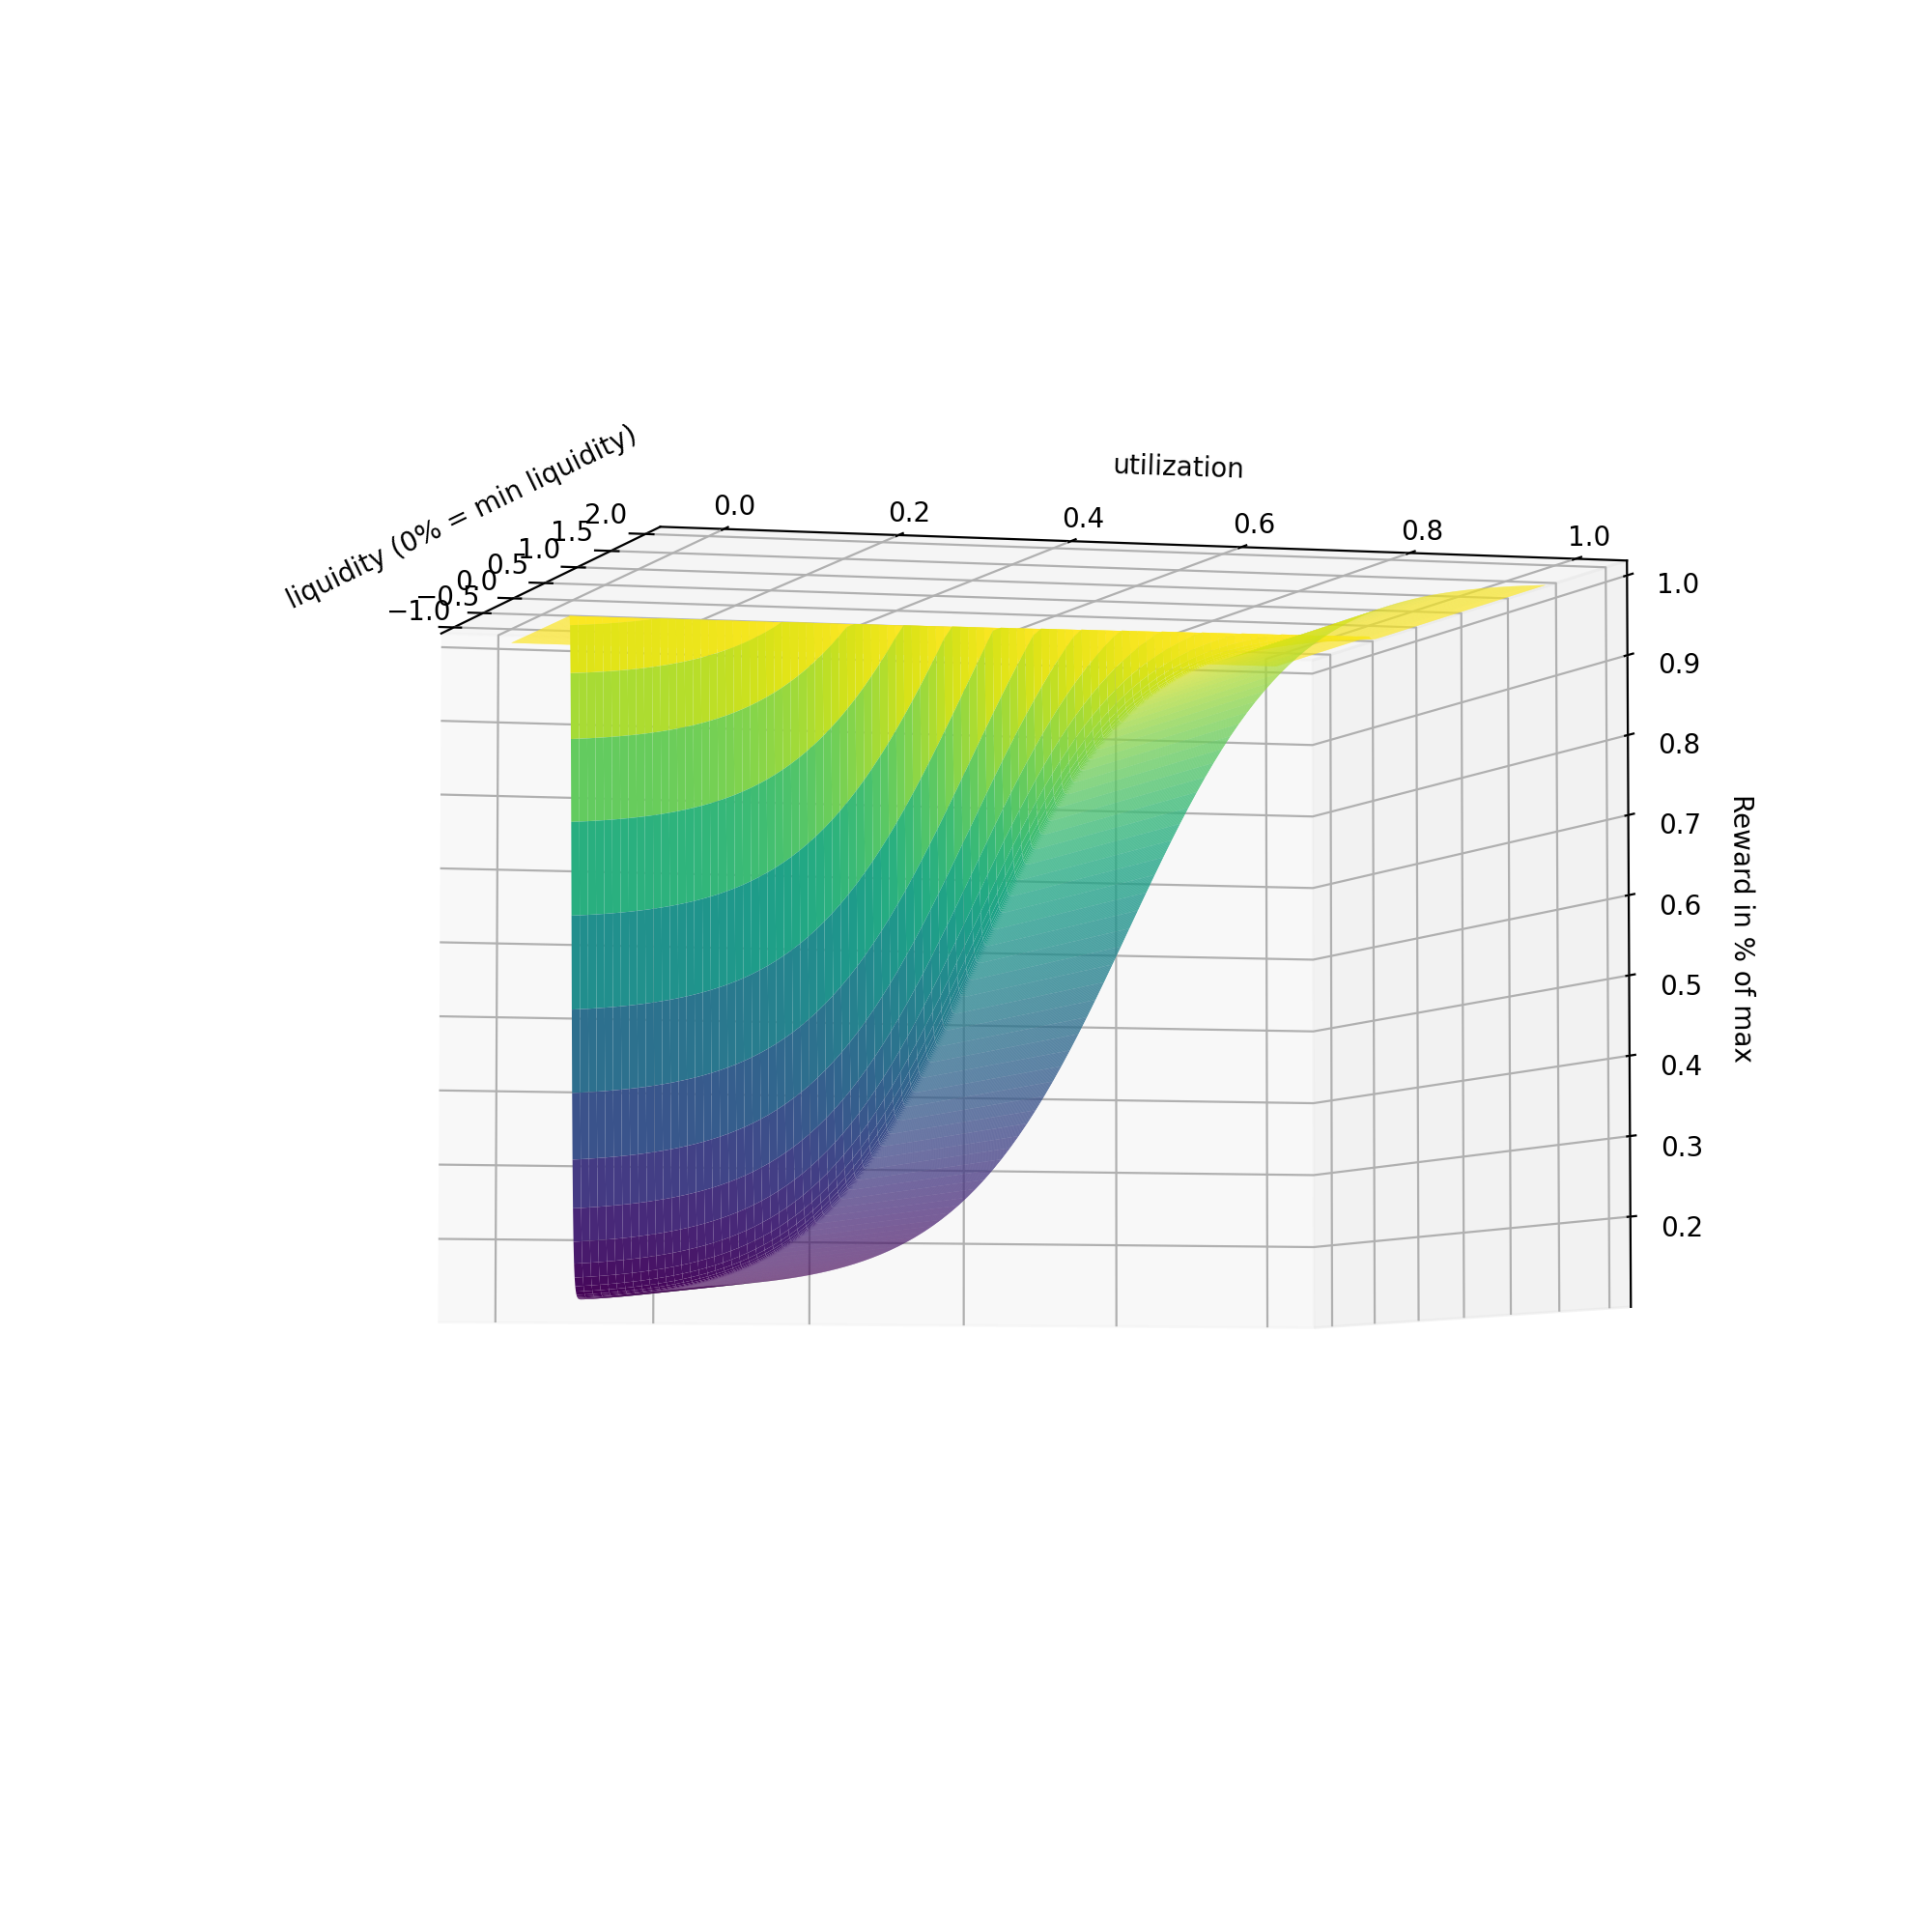

(100, 300)
(300,)


Text(0.5, 0, 'Reward in % of max')

In [91]:
%matplotlib notebook
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
steepness_liq=50
spoint_liq = 0
steepness_util=10
spoint_util = 0.5
min_util = 0.1

X,Y = np.meshgrid(x,y)
Z = func_agg(X,Y,steepness_liq,spoint_liq,steepness_util,spoint_util,min_util)

ax.plot_surface(X, Y, Z, rstride=1,cstride=1,cmap='viridis')
ax.set_xlabel('liquidity (0% = min liquidity)')
ax.set_ylabel('utilization')
ax.set_zlabel('Reward in % of max')

In [86]:
np.amin(Z)

0.10668787748350742

In [23]:
len(liq_vals)

100

In [41]:
df=pd.DataFrame(zip(list([liq_vals,util_vals])))


In [42]:
df

,0
0,"[0.5, 0.3775406687981454, 0.2689414213699951, ..."
1,"[0.0066928509242848554, 0.0060598014915841155,..."
